In [23]:
import numpy as np
import networkx as nx
import ndlib.models.epidemics.SIRModel as sir
from ndlib.utils import multi_runs
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from network_optimizer import *

from sklearn.cluster import SpectralClustering
from sklearn import metrics

from submodular_fun import covdiv_F
import pandas as pd 

from bokeh.io import output_notebook, show
import matplotlib.pyplot as plt
from math import *
import os

import warnings
warnings.filterwarnings("ignore")

In [6]:
lambda_res = pd.read_csv('experiments/hyperparameters_opt/hyp_par_lambda.csv')
alpha_res = pd.read_csv('experiments/hyperparameters_opt/hyp_par_alpha.csv')
r_res = pd.read_csv('experiments/hyperparameters_opt/hyp_par_r.csv')

In [9]:
lambda_res['0'] -= 626

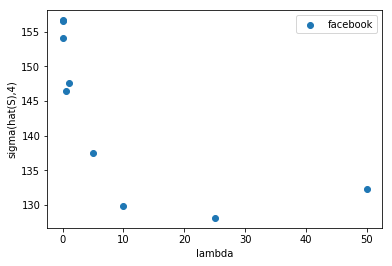

In [25]:
plt.scatter([0, 0.05, 0.1, 0.5, 1, 5, 10, 25, 50], lambda_res['0'], label='facebook')
plt.xlabel('lambda')
plt.ylabel('sigma(hat(S),4)')
plt.legend()
plt.savefig('hyp_par_lambda.png')
plt.show()

In [29]:
L = ['facebook']#[1, 2, 3, 4, 8, 15] #, 20, 50]
k = 25
p = 0.4
R = [0, 0.05, 0.1, 0.3, 0.5, 1, 3, 5, 10, 20]
Res_r = np.zeros((len(R), len(L)))
lambda0 = 0.1
parameters = {'beta' : 0.01, 'gamma': 0.1, 'T': 3, 'N': 100}
j = 0
for l in L:
    i = 0
    #g=nx.relaxed_caveman_graph(l, k, p) #better models for social networks
    file = 'data/facebook_combined.txt'
    g = nx.read_edgelist(file,create_using=nx.Graph())
    g = nx.convert_node_labels_to_integers(g)
    V = list(g.nodes)
    nbr_nodes = len(V)
    adj = nx.adjacency_matrix(g)
    sim = cosine_similarity(adj,adj)
    budget = np.amax(np.array(adj.sum(axis=0)))
    degree_cent = nx.degree_centrality(g)
    V = list(g.nodes)
    opt = Optimizer_contagion_Model(g, parameters)
    n_cluster = ceil(0.01*nbr_nodes)
    cluster = opt.get_cluster(n_cluster)
    print('cluster done')
    for r in R:
        cost = lambda S:len(S) #Constant cost
        f_sub = lambda S : covdiv_F(S, V, cluster, sim, degree_cent, lambda1=lambda0)
        S = opt.greedy_submodular(f_sub, None, budget=budget, r=r, lazy=True)
        Res_r[i][j] = opt.f_sub(S)
        i += 1
    j += 1
print(pd.DataFrame(Res_r))
pd.DataFrame(Res_r).to_csv("experiments/hyperparameters_opt/hyp_par_r.csv")

cluster done
        0
0   25.08
1  153.61
2  153.82
3  359.38
4  374.72
5  393.95
6  411.47
7  414.97
8  414.61
9  416.27


        0
0   25.08
1  153.61
2  153.82
3  359.38
4  374.72
5  393.95
6  411.47
7  414.97
8  410.20
9  408.50


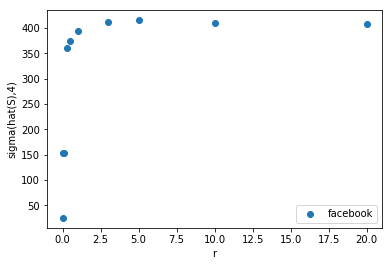

In [31]:
Res_r[8,0] = 410.2
Res_r[9,0] = 408.5
print(pd.DataFrame(Res_r))
plt.scatter(R, Res_r[:,0], label=L[0])
plt.xlabel('r')
plt.ylabel('sigma(hat(S),4)')
plt.legend()
plt.savefig('hyp_par_r.png')
plt.show()

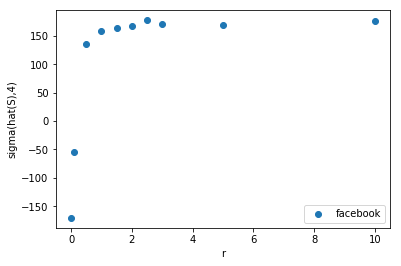

In [22]:
plt.scatter([0, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 5, 10], r_res['0'], label='facebook')
plt.xlabel('r')
plt.ylabel('sigma(hat(S),4)')
plt.legend()
plt.savefig('hyp_par_r.png')
plt.show()

In [15]:
alpha_res['0'] -= 626

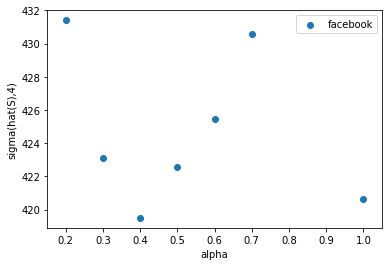

In [18]:
plt.scatter([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1], alpha_res['0'], label='facebook')
plt.xlabel('alpha')
plt.ylabel('sigma(hat(S),4)')
plt.legend()
plt.savefig('hyp_par_alpha.png')
plt.show()

In [33]:
len([397, 404, 582, 1319, 1067, 1046, 952, 872, 692, 631, 605, 2406, 2754, 2711, 2575, 2612, 3978, 3943, 3868, 3865, 3834, 3812, 3766, 3748, 3730, 3676, 3603, 3497, 3495, 3435, 3415, 3342, 3335, 3195, 3139, 3059, 11, 12, 335, 292, 287, 215, 210, 209, 114, 74, 43, 37, 18, 15, 1750, 4035, 1760, 1526, 1696, 1603, 1763, 1764, 1812, 1808, 1786, 1776, 1946, 1837, 1767, 3987, 4025, 4023, 4016, 4012, 4010, 2037, 2036, 2029, 2021, 881, 916, 812, 880, 551, 710, 2799, 2670, 2911, 2421, 353, 2357, 2910, 3725, 3751, 3930, 3620, 3821, 3965, 3885, 3822, 3894, 3764, 748, 662, 1175, 762, 1240, 719, 1507, 1044, 2786, 756, 153, 1339, 305, 267, 3393, 1506, 138, 35, 70, 216, 154, 160, 52, 255, 90, 286, 47, 282, 33, 233, 3710, 2006, 3859, 2553, 2661, 3888, 3866, 3950, 3274, 183, 205, 241, 145, 256, 42, 244, 316, 1820, 234, 279, 1543, 1599, 1562, 1541, 1895, 1844, 1920, 1793, 1746, 1623, 3986, 4008, 1889, 4036, 4029, 4030, 3990, 1894, 1986, 2005, 1789, 4032, 4003, 4013, 4034, 520, 1032, 738, 1113, 694, 1072, 385, 2424, 2367, 2882, 3762, 2509, 2377, 2481, 3961, 2271, 3825, 3614, 3720, 3752, 848, 3830, 1245, 390, 513, 532, 739, 839, 557, 1178, 3594, 294, 2549, 3350, 3123, 3129, 155, 2913, 293, 3434, 3713, 2580, 253, 71, 228, 2291, 3738, 3608, 3936, 2361, 3815, 2528, 2299, 3509, 3627, 336, 207, 3711, 321, 112, 3352, 240, 97, 164, 301, 247, 157, 81, 61, 191, 3272, 3323, 182, 179, 76, 1604, 1807, 1610, 1572, 1930, 1801, 1650, 1547, 1550, 1524, 1888, 1999, 1714, 431, 869, 1198, 960, 1717, 2678, 3876, 3598, 3918, 3619, 3796, 3947, 3648, 3905, 517, 508, 4007, 3994, 1137, 3322, 591, 3993, 996, 488, 680, 4033, 2961, 262, 202, 3412, 2419, 1341, 482, 201, 355, 1247, 3708, 2519, 2657, 686, 3535, 3891, 3969, 354, 3678, 3953, 356, 3958, 3959, 3960, 2116, 3574, 3781, 3698, 120, 3982, 125, 220, 307, 3003, 289, 3144, 166, 124, 327, 2982, 1996, 3082, 3383, 288, 174, 190, 49, 270, 206, 1678, 1698, 1935, 1933, 1862, 543, 415, 972, 750, 1261, 2310, 2751, 1548, 1731, 1567, 1732, 2682, 2038, 3530, 380, 3992, 3933, 928, 1622, 1977, 1715, 2014, 250, 3158, 781, 962, 643, 903, 1262, 3313, 396, 34, 1093, 840, 524, 1997, 2272, 941])

379